# Водораздел
http://cmm.ensmp.fr/~beucher/wtshed.html

In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Threshhold=189

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

## Разметка

In [3]:
#http://maschek.hu/imagemap/imgmap/
#http://imagemap-generator.dariodomi.de/
    
#1_vlcsnap-2019-04-27-21h42m57s248.png
dt=[10, [1276,110,1270,228,1198,218,1019,197,922,189,760,178,734,119,746,12,882,22,1075,53,1211,86],
10, [734,9,728,122,744,175,522,167,298,167,211,170,98,181,4,194,1,69,210,23,356,10],
37, [1277,252,1278,351,1131,349,751,336,754,202,1010,217],
37, [747,334,743,202,570,194,357,188,199,193,1,210,2,314],
17, [546,345,542,408,520,465,262,452,98,436,2,423,3,332],
20, [552,348,547,406,528,462,726,475,938,474,1140,468,1277,458,1278,370,977,363,759,358],
17, [6,518,4,440,108,451,258,465,447,479,672,489,708,491,712,588,401,574,171,549],
8, [716,502,720,588,959,579,1161,562,1277,542,1278,473,1053,487,861,490,718,494],
11, [89,552,43,637,276,691,313,700,325,655,307,580],
9, [318,700,329,657,311,582,448,594,505,596,511,719],
75, [513,600,514,718,926,718,1137,686,1277,649,1279,557,1095,585,821,602,675,604]]

In [4]:
labels=dt[0::2]
coords=dt[1::2]

In [5]:
for i in range(len(coords)):
    xs=coords[i][::2]
    ys=coords[i][1::2]

In [21]:
print(np.mean(coords[0][::2]), np.mean(coords[0][1::2]))
print(coords[0][::2])
print(coords[0][1::2])

1008.4545454545455 128.36363636363637
[1276, 1270, 1198, 1019, 922, 760, 734, 746, 882, 1075, 1211]
[110, 228, 218, 197, 189, 178, 119, 12, 22, 53, 86]


In [6]:
#print(np.array(coords[0]).shape)
#print(len(np.array(coords[0])))
print(np.array(coords[0]).reshape(int(len(np.array(coords[0]))/2),2))
firs=np.array(coords[0]).reshape(int(len(np.array(coords[0]))/2),2)

[[1276  110]
 [1270  228]
 [1198  218]
 [1019  197]
 [ 922  189]
 [ 760  178]
 [ 734  119]
 [ 746   12]
 [ 882   22]
 [1075   53]
 [1211   86]]


In [10]:
#data = pd.read_csv("/home/zamarseny/Data_Science/input_data/shelves/4_vlcsnap-2019-04-27-21h47m21s257.txt")

In [54]:
#data=np.loadtxt("/home/zamarseny/Data_Science/input_data/shelves/4_vlcsnap-2019-04-27-21h47m21s257.txt")
#data=np.loadtxt(fname = "/home/zamarseny/Data_Science/input_data/shelves/4_vlcsnap-2019-04-27-21h47m21s257.txt", delimiter =',')

In [46]:
#vis=cv2.imread('/home/zamarseny/Data_Science/input_data/shelves/4_vlcsnap-2019-04-27-21h47m21s257.png')
vis=cv2.imread('/home/zamarseny/Data_Science/input_data/shelves/4_vlcsnap-2019-04-28-08h39m59s320.png')

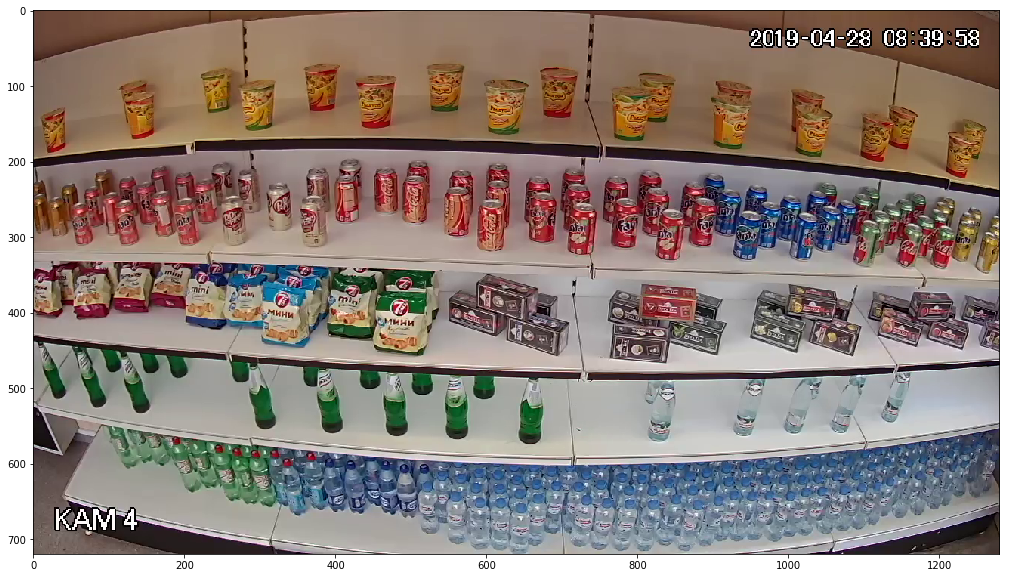

In [47]:
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))

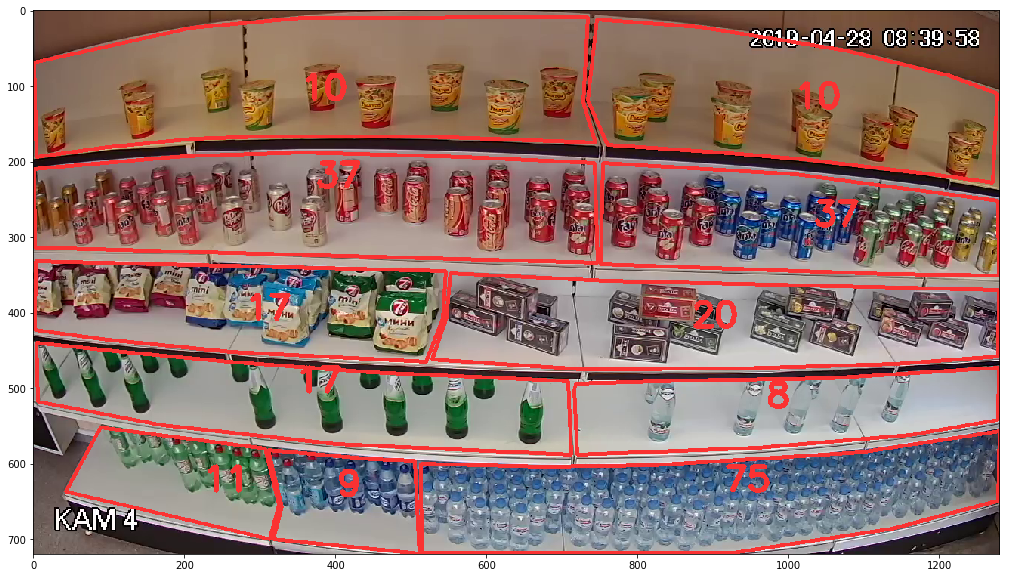

In [48]:
mask = vis#np.zeros((img.shape[0], img.shape[1]))

for i in range(len(labels)):
    #cv2.fillConvexPoly(mask, pts, 1)
    pts = np.array(coords[i]).reshape(int(len(np.array(coords[i]))/2),2)
    cv2.polylines(mask,[pts],True,(50,50,250), 3)

    cv2.putText(mask, str(labels[i])
                    #, (50,425, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,50,100), 2);
                    , (int(np.mean(coords[i][::2])), int(np.mean(coords[i][1::2]))), \
                    #,(100, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (50,50,250), 6);
#mask = mask.astype(np.bool)

#out = np.zeros_like(vis)
#out[mask] = vis[mask]
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

In [ ]:
#bbox1 = cv.selectROI('tracking', image)

In [38]:
img = cv2.imread('../data/shelves_with_water.png')
#img = cv2.imread('../data/briskly_box.png')

In [39]:
plt.rcParams["figure.figsize"] = (10,10)

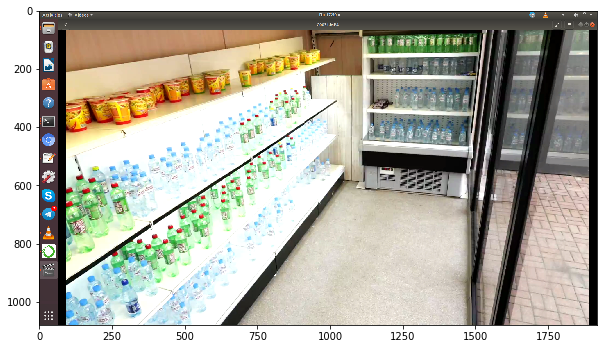

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [41]:
img = cv2.imread('../data/just_water.jpg')
#img = cv2.imread('../data/briskly_box.png')

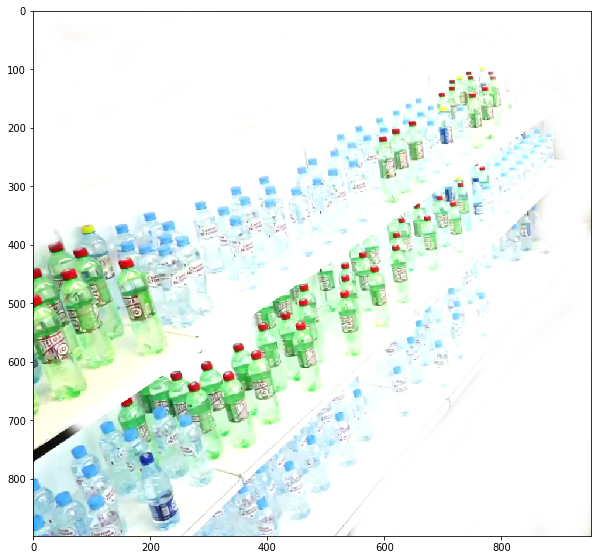

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Сегментируем по порогу

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, 
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [44]:
print(cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

1 8


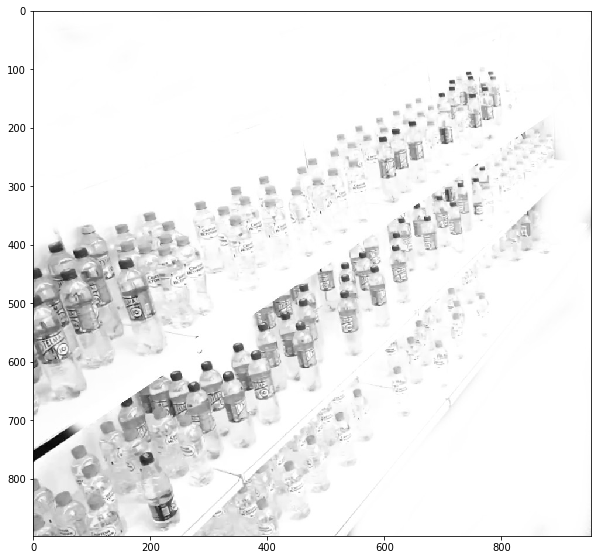

In [45]:
plt.imshow(gray, cmap='gray')

In [53]:
img = cv2.imread('../data/just_water.jpg')
#img = cv2.imread('../data/briskly_box.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,1)
contours,h = cv2.findContours(thresh,1,2)
for cnt in contours:
    cv2.drawContours(img,[cnt],0,(0,0,255),1)

In [54]:
len(contours)

353

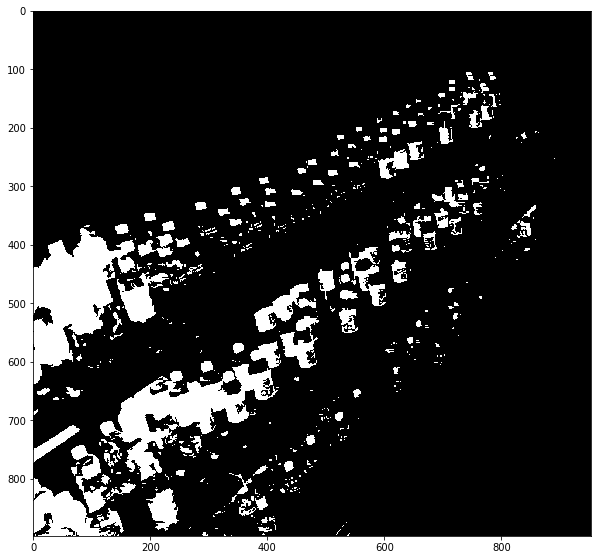

In [56]:
from skimage import io, filters
from scipy import ndimage
import matplotlib.pyplot as plt

#im = io.imread('../data/briskly_box.png', as_grey=True)
im = io.imread('../data/just_water.jpg', as_grey=True)
val = filters.threshold_otsu(im)
drops = ndimage.binary_fill_holes(im < val)
plt.imshow(drops, cmap='gray')
plt.show()

In [57]:
from skimage import measure
labels = measure.label(drops)
print(labels.max())
#And for the coverage
print('coverage is %f' %(drops.mean()))

669
coverage is 0.112395


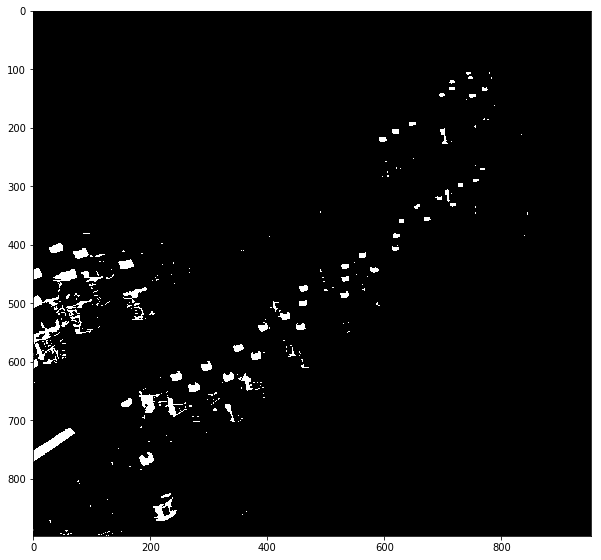

In [58]:
plt.imshow(thresh, cmap='gray')

## Применяем операцию dilate

In [59]:
# sure background area
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(thresh,kernel,iterations=3)

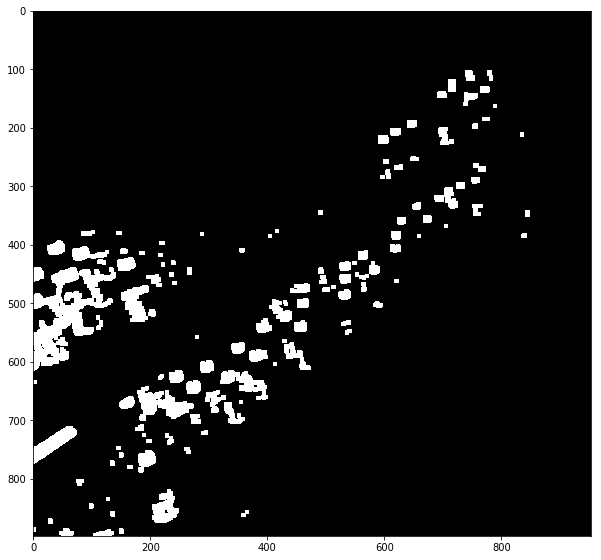

In [60]:
plt.imshow(sure_bg, cmap='gray')

## Для каждого пикселя вычисляем расстояние до ближашей грани

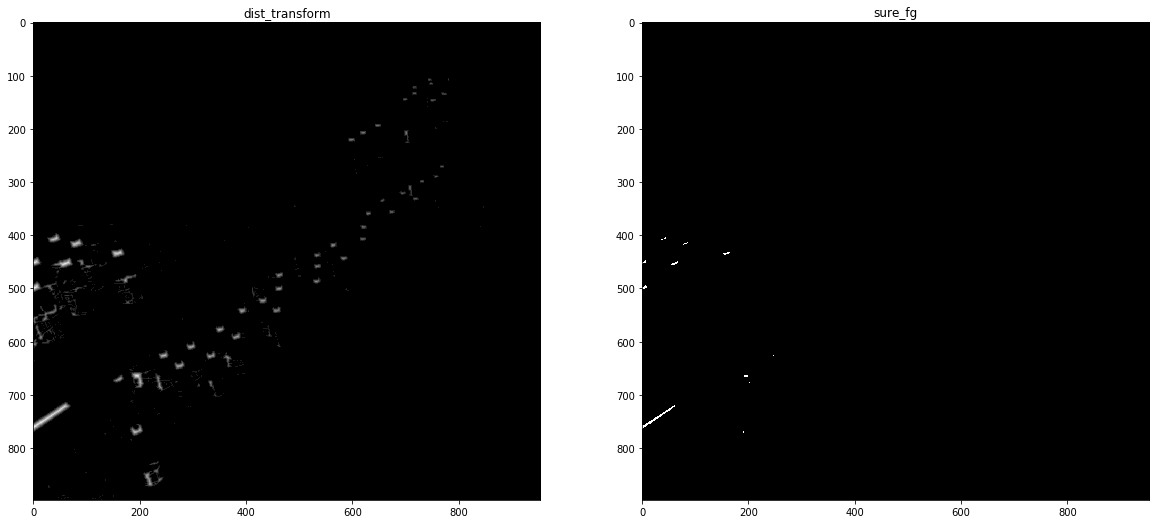

In [61]:
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

fig = plt.figure(figsize=(20, 10))

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(dist_transform, cmap='gray');
subplot.set_title('dist_transform');

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(sure_fg, cmap='gray');
subplot.set_title('sure_fg');

## Получаем маску областей неопределенности

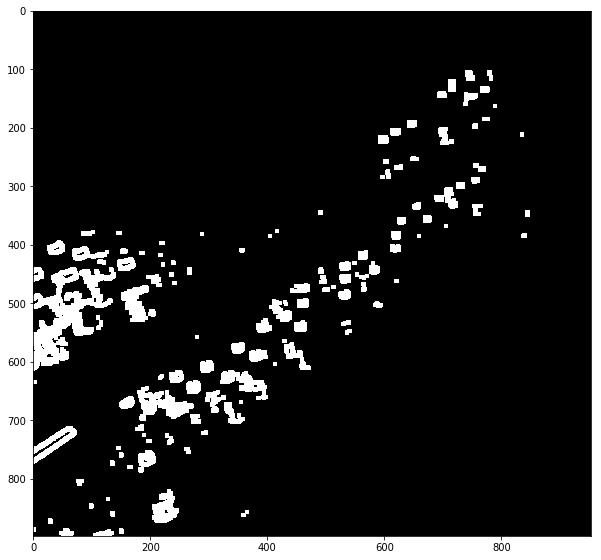

In [62]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

## Задаем маркеры начального приближения

In [63]:
# объединяем соседние пиксели в связные компоненты
# в результате для каждого пикселя известен номер связной компоненты
# для пикселей фона (с нулевой интенсивностью) номер компоненты равен 0
ret, markers = cv2.connectedComponents(sure_fg)
# инкрементируем значения компонент на единицу, у фона теперь кластер 1
markers = markers + 1
# неизвестную область обозначаем свободной
markers[unknown==255] = 0

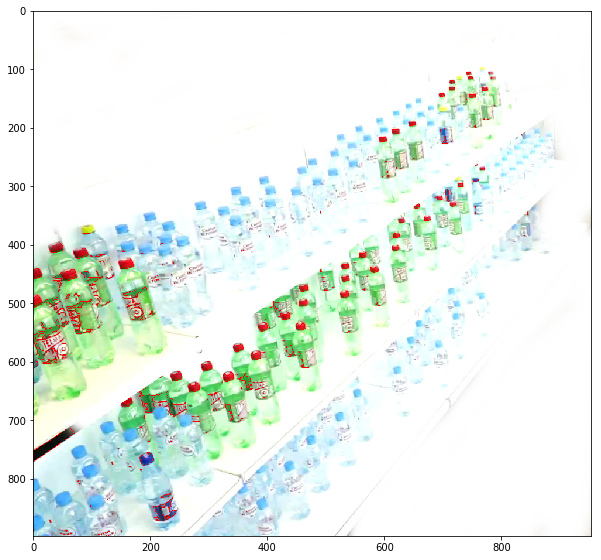

In [64]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Применяем алгоритм водораздела для сегментации

In [65]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

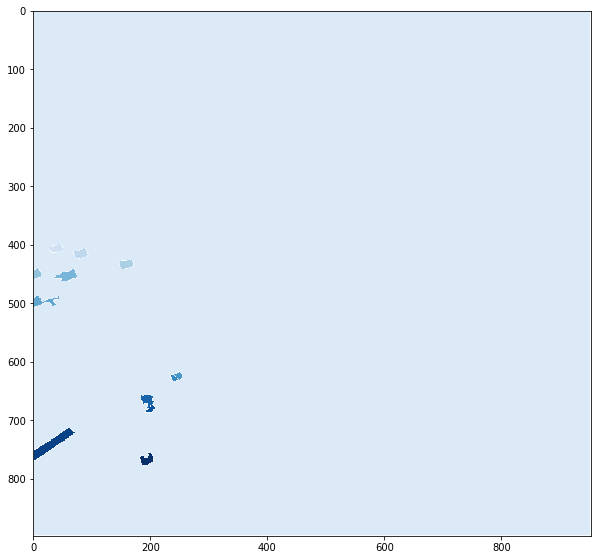

In [66]:
plt.imshow(markers, cmap=plt.cm.Blues)

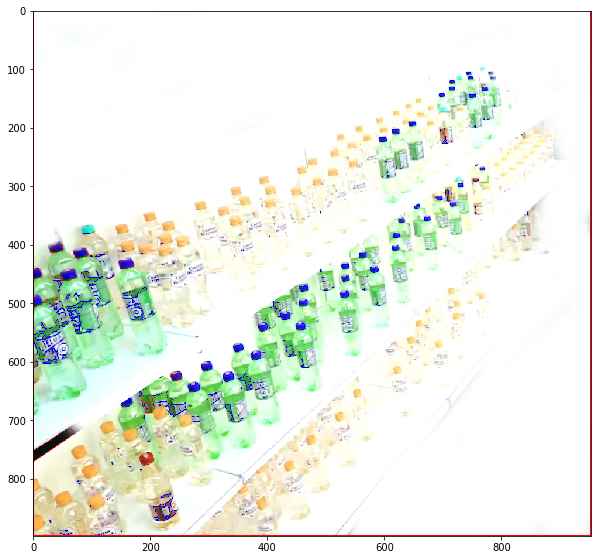

In [67]:
plt.imshow(img)

In [68]:
su=0
for i in markers:
    su+=1
    le=len(i)
print(su, le)

898 954


In [ ]:
markers